# Scoring Model with Fake Data

In [233]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

from sklearn.base import TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LassoCV

In [196]:
file_path = "/Users/Phoestia/Desktop/fake-data.xlsx"

In [197]:
df = pd.ExcelFile(file_path)

df.sheet_names


['1']

In [198]:
fake = df.parse("1")
fake.head()

,ID,First Name,Last Name,Age,Nationality,Sex,Phone Number,Employee statue,Previous Job,Education,Internship times,GPA,Number of Lauguage Speak,Number of career experiences,Unemployee Months,Kids,Yongest kid ages,Pets,Annually Income Before Immigrate,School Name,School Ranking,Major,Foreign Travel Times,Fail times to find job,Connections in Canada,Number of connection on LinkedIn,Number of Friend on Facebook,Travel time to city center,Programming,Designing,Testing,Planning,Trouble Shotting,Managing,Creating Exam,Grading Examing,Teaching,Childcare,Networking,Love to Learning,Patience,Accuracy,Analysis,Attention to Detail,Mathematical,Writing,Teamwork,Triaging Patients,Performing CPR,Drawing Blood,Applying dressing,Processing insurance forms,Ordering medical supplies
0,1,Keely,Wysong,35,India,F,(207) 361-2153,0,Accountant,Bachelor,0,2.64,2,3,7,3,1,0,169131,aaa,440,Mathematics,4,2,15,126,968,3.0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0
1,2,Roma,Mcbean,41,China,F,(539) 969-6863,0,Developer,Master,0,1.48,3,3,15,2,2,1,148384,bbb,134,Computer Science,6,3,17,183,382,3.5,1,1,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0
2,3,Debi,Luken,40,Philippines,F,(820) 666-8918,0,Developer,PhD,2,3.34,4,5,3,1,3,0,198613,ccc,222,Computer Science,6,4,9,136,241,0.5,1,1,1,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0
3,4,Ferne,Krok,31,Vietnam,F,(399) 312-0876,0,Teacher,High School,1,1.27,3,5,21,3,1,2,148589,ddd,0,Art,6,2,2,12,318,2.9,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0
4,5,Annamaria,Albarran,39,United States,F,(319) 501-9522,1,Teacher,PhD,0,3.63,7,2,2,0,0,1,93205,eee,33,Mathematics,3,4,13,78,772,2.8,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0


In [199]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 53 columns):
ID                                  24 non-null int64
First Name                          24 non-null object
Last Name                           24 non-null object
Age                                 24 non-null int64
Nationality                         24 non-null object
Sex                                 24 non-null object
Phone Number                        24 non-null object
Employee statue                     24 non-null int64
Previous Job                        24 non-null object
Education                           24 non-null object
Internship times                    24 non-null int64
GPA                                 24 non-null float64
Number of Lauguage Speak            24 non-null int64
Number of career experiences        24 non-null int64
Unemployee Months                   24 non-null int64
Kids                                24 non-null int64
Yongest kid ages        

In [200]:
fake1=fake.drop(['First Name','Last Name','Phone Number','ID','School Name'],axis=1)
fake1.head()

,Age,Nationality,Sex,Employee statue,Previous Job,Education,Internship times,GPA,Number of Lauguage Speak,Number of career experiences,Unemployee Months,Kids,Yongest kid ages,Pets,Annually Income Before Immigrate,School Ranking,Major,Foreign Travel Times,Fail times to find job,Connections in Canada,Number of connection on LinkedIn,Number of Friend on Facebook,Travel time to city center,Programming,Designing,Testing,Planning,Trouble Shotting,Managing,Creating Exam,Grading Examing,Teaching,Childcare,Networking,Love to Learning,Patience,Accuracy,Analysis,Attention to Detail,Mathematical,Writing,Teamwork,Triaging Patients,Performing CPR,Drawing Blood,Applying dressing,Processing insurance forms,Ordering medical supplies
0,35,India,F,0,Accountant,Bachelor,0,2.64,2,3,7,3,1,0,169131,440,Mathematics,4,2,15,126,968,3.0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0
1,41,China,F,0,Developer,Master,0,1.48,3,3,15,2,2,1,148384,134,Computer Science,6,3,17,183,382,3.5,1,1,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0
2,40,Philippines,F,0,Developer,PhD,2,3.34,4,5,3,1,3,0,198613,222,Computer Science,6,4,9,136,241,0.5,1,1,1,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0
3,31,Vietnam,F,0,Teacher,High School,1,1.27,3,5,21,3,1,2,148589,0,Art,6,2,2,12,318,2.9,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0
4,39,United States,F,1,Teacher,PhD,0,3.63,7,2,2,0,0,1,93205,33,Mathematics,3,4,13,78,772,2.8,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0


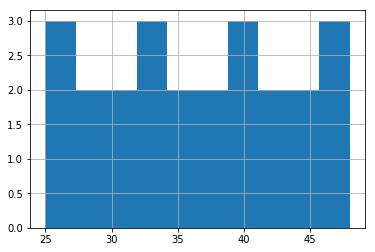

In [201]:
fake1["Age"].hist()

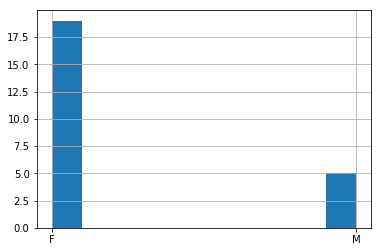

In [202]:
fake1["Sex"].hist()

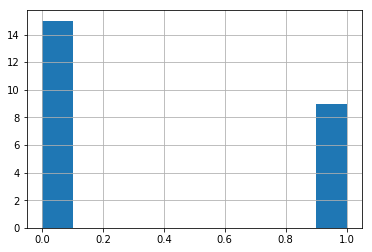

In [203]:
fake1["Employee statue"].hist()

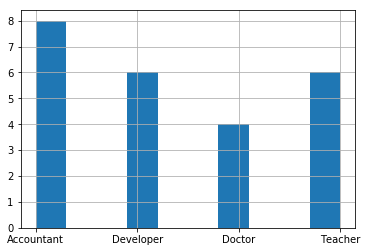

In [204]:
fake1["Previous Job"].hist()

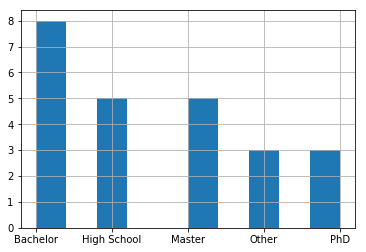

In [205]:
fake1["Education"].hist()

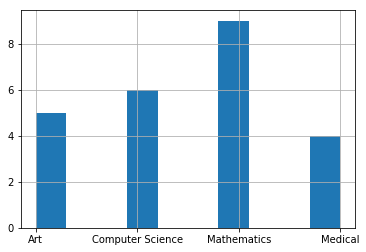

In [206]:
fake1["Major"].hist()

In [207]:
fake1.dtypes

Age                                   int64
Nationality                          object
Sex                                  object
Employee statue                       int64
Previous Job                         object
Education                            object
Internship times                      int64
GPA                                 float64
Number of Lauguage Speak              int64
Number of career experiences          int64
Unemployee Months                     int64
Kids                                  int64
Yongest kid ages                      int64
Pets                                  int64
Annually Income Before Immigrate      int64
School Ranking                        int64
Major                                object
Foreign Travel Times                  int64
Fail times to find job                int64
Connections in Canada                 int64
Number of connection on LinkedIn      int64
Number of Friend on Facebook          int64
Travel time to city center      

In [209]:
Nationality=pd.get_dummies(fake1['Nationality'],drop_first=True, prefix='Nationality')

Sex=pd.get_dummies(fake1['Sex'],drop_first=True, prefix='Sex')

Previous_Job=pd.get_dummies(fake1['Previous Job'],drop_first=True, prefix='Previous Job')

Education=pd.get_dummies(fake1['Education'],drop_first=True, prefix='Education')

Major=pd.get_dummies(fake1['Major'],drop_first=True, prefix='Major')



fake1.drop(['Nationality','Sex','Previous Job','Education','Major'],axis=1,inplace=True)

fake1.dropna(inplace=True)

fake1=pd.concat([fake1,Nationality, Sex, Previous_Job,Education, Major],axis=1)

fake1.head(10)

,Age,Employee statue,Internship times,GPA,Number of Lauguage Speak,Number of career experiences,Unemployee Months,Kids,Yongest kid ages,Pets,Annually Income Before Immigrate,School Ranking,Foreign Travel Times,Fail times to find job,Connections in Canada,Number of connection on LinkedIn,Number of Friend on Facebook,Travel time to city center,Programming,Designing,Testing,Planning,Trouble Shotting,Managing,Creating Exam,Grading Examing,Teaching,Childcare,Networking,Love to Learning,Patience,Accuracy,Analysis,Attention to Detail,Mathematical,Writing,Teamwork,Triaging Patients,Performing CPR,Drawing Blood,Applying dressing,Processing insurance forms,Ordering medical supplies,Nationality_India,Nationality_Iran,Nationality_Italy,Nationality_Pakistan,Nationality_Philippines,Nationality_United Kingdom,Nationality_United States,Nationality_Vietnam,Sex_M,Previous Job_Developer,Previous Job_Doctor,Previous Job_Teacher,Education_High School,Education_Master,Education_Other,Education_PhD,Major_Computer Science,Major_Mathematics,Major_Medical
0,35,0,0,2.64,2,3,7,3,1,0,169131,440,4,2,15,126,968,3.0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,41,0,0,1.48,3,3,15,2,2,1,148384,134,6,3,17,183,382,3.5,1,1,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,40,0,2,3.34,4,5,3,1,3,0,198613,222,6,4,9,136,241,0.5,1,1,1,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,31,0,1,1.27,3,5,21,3,1,2,148589,0,6,2,2,12,318,2.9,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
4,39,1,0,3.63,7,2,2,0,0,1,93205,33,3,4,13,78,772,2.8,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
5,27,0,1,2.01,1,5,21,1,2,0,83789,234,1,1,8,167,634,2.8,1,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
6,46,0,2,1.17,2,4,11,1,5,2,151451,0,3,1,10,79,556,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,29,0,1,3.09,3,5,23,1,8,3,101619,489,10,3,17,118,893,1.0,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,30,0,2,3.51,1,1,13,3,1,1,155136,429,1,2,2,110,975,1.4,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
9,38,0,3,3.97,3,4,20,0,0,3,52878,358,4,2,5,93,750,2.1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [210]:
def splitTargetAndPredictors(df,Target):
    '''seperate the response variable'''
    targetDf=pd.DataFrame(fake1['Employee statue'])
    del df['Employee statue']
    return df,targetDf

x,y=splitTargetAndPredictors(fake1.copy(),'Employee statue')

In [211]:
x.shape, y.shape

((24, 61), (24, 1))

In [212]:
from sklearn.model_selection import train_test_split
x_train_set, x_test_set = train_test_split(x, test_size=0.2, random_state=42)
y_train_set, y_test_set = train_test_split(y, test_size=0.2, random_state=42)

x_train_set.shape, x_test_set.shape,y_train_set.shape, y_test_set.shape

((19, 61), (5, 61), (19, 1), (5, 1))

In [176]:
x_train_set.head()

,Age,Internship times,GPA,Number of Lauguage Speak,Number of career experiences,Unemployee Months,Kids,Yongest kid ages,Pets,Annually Income Before Immigrate,School Ranking,Foreign Travel Times,Fail times to find job,Connections in Canada,Number of connection on LinkedIn,Number of Friend on Facebook,Travel time to city center,Programming,Designing,Testing,Planning,Trouble Shotting,Managing,Creating Exam,Grading Examing,Teaching,Childcare,Networking,Love to Learning,Patience,Accuracy,Analysis,Attention to Detail,Mathematical,Writing,Teamwork,Triaging Patients,Performing CPR,Drawing Blood,Applying dressing,Processing insurance forms,Ordering medical supplies,Nationality_India,Nationality_Iran,Nationality_Italy,Nationality_Pakistan,Nationality_Philippines,Nationality_United Kingdom,Nationality_United States,Nationality_Vietnam,Sex_M,Previous Job_Developer,Previous Job_Doctor,Previous Job_Teacher,Education_High School,Education_Master,Education_Other,Education_PhD
9,38,3,3.97,3,4,20,0,0,3,52878,358,4,2,5,93,750,2.1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
13,32,1,2.72,6,2,3,2,3,2,194850,99,7,3,8,171,909,2.8,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,41,0,1.48,3,3,15,2,2,1,148384,134,6,3,17,183,382,3.5,1,1,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
21,43,1,1.02,3,1,13,2,4,2,204156,0,3,3,14,127,469,1.0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
5,27,1,2.01,1,5,21,1,2,0,83789,234,1,1,8,167,634,2.8,1,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0


In [213]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train_set, y_train_set)

x_train_res.shape,y_train_res.shape

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/imblearn/utils/deprecation.py:55: DeprecationWarning: In the estimator <class 'imblearn.over_sampling.smote.SMOTE'>, the parameter 'ratio' isdeprecated from 0.4 and will be removed in 0.6. Use 'sampling_strategy' instead.
  category=DeprecationWarning)


((22, 61), (22,))

#### Plot Correlation

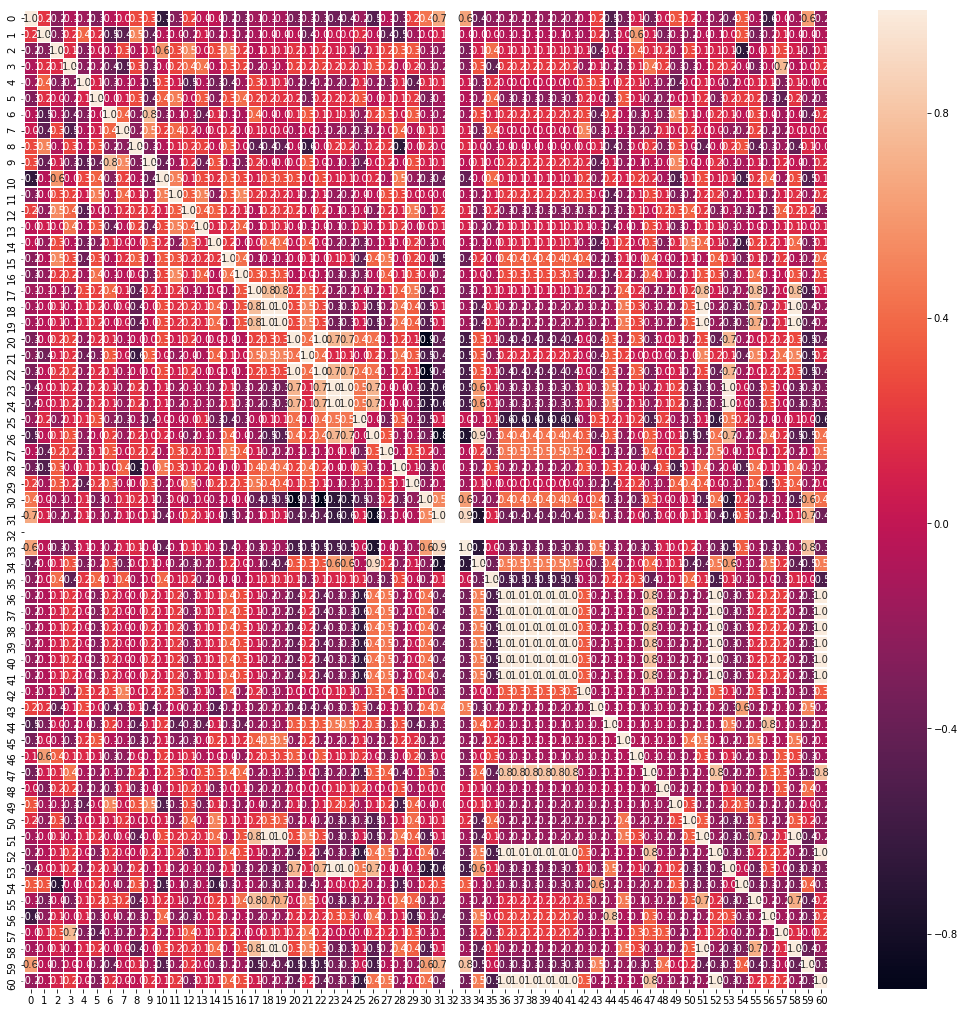

In [214]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pd.DataFrame(x_train_res).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### Univariate feature selection and random forest classifation 

In [215]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train_set, y_train_set)

In [216]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train_set.columns)

Score list: [  2.74544489e+00   7.73437500e-01   2.20737480e-01   6.47727273e-01
   7.00606061e-01   3.90943559e+01   6.13636364e-01   5.54018445e-01
   4.37062937e-04   4.13704314e+04   6.32137948e+02   1.15162512e+01
   3.78787879e-03   3.07916025e+00   6.98929513e+00   4.40145494e+00
   2.68922840e+00   1.59280303e+00   2.90909091e+00   2.90909091e+00
   2.84090909e-01   6.67929293e-01   2.84090909e-01   1.53409091e-01
   1.53409091e-01   7.08041958e-02   6.67929293e-01   2.02020202e-02
   1.48760331e-01   8.74125874e-02   6.67929293e-01   6.96022727e-02
   0.00000000e+00   1.62337662e-03   1.36505682e+00   1.44034091e+00
   7.42424242e-01   7.42424242e-01   7.42424242e-01   7.42424242e-01
   7.42424242e-01   7.42424242e-01   5.11363636e-02   5.11363636e-02
   1.37500000e+00   7.27272727e-01   1.45454545e+00   5.11363636e-02
   5.11363636e-02   7.42424242e-01   1.02272727e-01   2.90909091e+00
   7.42424242e-01   1.53409091e-01   9.09090909e-03   4.80113636e-01
   5.11363636e-02   7.

Accuracy is:  0.6


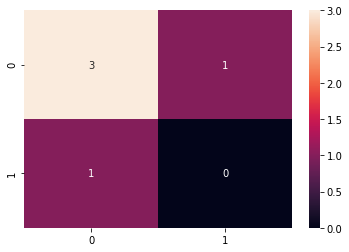

In [217]:
x_train_2 = select_feature.transform(x_train_set)
x_test_2 = select_feature.transform(x_test_set)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train_set)
ac_2 = accuracy_score(y_test_set,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test_set,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [218]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train_set, y_train_set)

In [219]:
print('Chosen best 5 feature by rfe:',x_train_set.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['Unemployee Months', 'Annually Income Before Immigrate',
       'Foreign Travel Times', 'Connections in Canada',
       'Number of connection on LinkedIn'],
      dtype='object')


### Scoring

##### Possbility to find a job

In [220]:
features = ['Unemployee Months', 'Annually Income Before Immigrate','Foreign Travel Times', 'Connections in Canada','Number of connection on LinkedIn']


In [ ]:
'Unemployee Months', 
'Annually Income Before Immigrate',
'Foreign Travel Times', 
'Connections in Canada',
'Number of connection on LinkedIn'

## Since the fake data doesn't really work out, we are using Age and Number of career experiences as our input to the model for now

In [223]:
features = ['Age', 'Number of career experiences']

In [224]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
x_train_set[features]=scl.fit_transform(x_train_set[features])
x_test_set[features]=scl.fit_transform(x_test_set[features])

In [226]:
x_train_set[features].head()

,Age,Number of career experiences
9,0.545455,0.6
13,0.272727,0.2
1,0.681818,0.4
21,0.772727,0.0
5,0.045455,0.8


In [227]:
from sklearn.grid_search import GridSearchCV

search = {"eps":[0.001,0.01,0.1,1.0,10.0]}

las = LassoCV(cv=5,eps=0.001)

search = GridSearchCV(las,search,n_jobs=-1)
search.fit(x_train_set,y_train_set)
parms = search.best_params_
print(parms)
las.fit(x_train_set,y_train_set)
y_pred = las.predict(x_test_set)
print(las.score(x_test_set,y_test_set))
las.coef_
las.alphas_


{'eps': 1.0}
-0.855395129477


array([ 8498.76454294,  7925.97625711,  7391.7919847 ,  6893.6099444 ,
        6429.00370625,  5995.71037358,  5591.61956134,  5214.7631174 ,
        4863.30553649,  4535.53502025,  4229.85513979,  3944.7770602 ,
        3678.91228905,  3430.96591366,  3199.73029412,  2984.07918142,
        2782.96223196,  2595.39989177,  2420.47862557,  2257.34646726,
        2105.20887044,  1963.32483847,  1831.00331537,  1707.59982007,
        1592.51330733,  1485.18324038,  1385.08686071,  1291.73664202,
        1204.67791564,  1123.48665604,  1047.7674156 ,   977.15139855,
         911.2946647 ,   849.87645429,   792.59762571,   739.17919847,
         689.36099444,   642.90037063,   599.57103736,   559.16195613,
         521.47631174,   486.33055365,   453.55350202,   422.98551398,
         394.47770602,   367.89122891,   343.09659137,   319.97302941,
         298.40791814,   278.2962232 ,   259.53998918,   242.04786256,
         225.73464673,   210.52088704,   196.33248385,   183.10033154,
      

In [293]:
las.coef_


array([  0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         2.19356256e-06,  -4.06555234e-04,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [228]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train_set, y_train_set)
predictions = regr.predict(x_test_set.values) 
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print("Mean squared error: %.2f" % np.mean((predictions - y_test_set.values) ** 2))
print('Variance score: %.2f' % regr.score(x_test_set.values, y_test_set.values))

Coefficients: 
 [[  6.32801109e-02  -1.21133017e-01  -4.04937994e-02   1.51347887e-01
   -7.51006429e-02  -6.09700510e-03   1.15499656e-01   8.71769284e-02
    3.97376457e-02  -4.87792430e-06  -3.05076264e-04  -8.22736163e-02
    7.25514265e-02  -1.80189829e-02   1.60708992e-03  -3.52915331e-04
   -1.65445304e-01  -7.92142184e-02  -6.81618227e-02  -6.81618227e-02
   -2.77671372e-02   1.12279900e-01  -2.77671372e-02  -4.27051813e-03
   -4.27051813e-03   6.23027374e-02   4.02647914e-02  -8.25299175e-02
    4.21727652e-02   1.80689694e-01   7.24323408e-02  -3.39990374e-02
    0.00000000e+00   3.02009252e-02   9.27942978e-02  -1.48484341e-01
    4.45353095e-02   4.45353095e-02   4.45353095e-02   4.45353095e-02
    4.45353095e-02   4.45353095e-02   3.61247865e-03   1.13716778e-01
    2.13557529e-02  -4.46652036e-02  -2.19492407e-02  -1.16066755e-02
   -6.49366898e-02  -1.29713990e-02   4.45249172e-02  -6.81618227e-02
    4.45353095e-02  -4.27051813e-03   2.66955633e-02   5.21801249e-02
   -

In [282]:
coefs
coefs.shape

(1, 61)

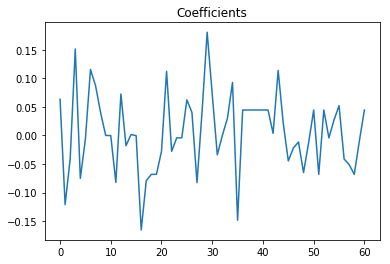

In [289]:
coefs = regr.coef_
coefs_transposed = coefs.T

plt.title('Coefficients')
ax.autoscale()
plt.plot(coefs_transposed)
plt.show()

### Binary Classification

##### Either find a job or not

In [189]:
seed = 42
scoring = 'accuracy'

In [190]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [191]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train_res, y_train_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.750000 (0.260875)
LDA: 0.516667 (0.390512)
K-NN: 0.400000 (0.213437)
CART: 0.550000 (0.357849)
NB: 0.833333 (0.210819)
SVM: 0.216667 (0.224227)


[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'K-NN'),
 Text(0,0,'CART'),
 Text(0,0,'NB'),
 Text(0,0,'SVM')]

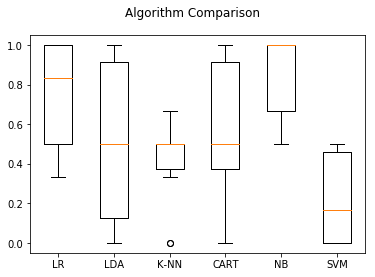

In [192]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

Score should more related to are they ready for work, how much they adapted to the society, learning speed, personality if open or not, 

In [ ]:
features = ['Age', 'Number of career experiences','Major']